# ANÁLISIS ESTADÍSTICO DE VARIABLES ALEATORIAS

### Nombre: Samuel Esteban Parra Osorio

In [53]:
# Librerías requeridas
using Random, Statistics, StatsBase, Plots, DataFrames, StatsPlots
Random.seed!(42)

# Generar 150 datos
n = 150


150

In [54]:
# Variable DISCRETA: Videojuegos vendidos por día (0-20)
juegos_vendidos = rand(0:20, n)

# Variable CONTINUA: Precio promedio en USD
precio_promedio = round.(rand(n) * 80 .+ 20, digits=2)

# Variable CUALITATIVA: Plataforma más vendida
plataformas = ["PlayStation", "Xbox", "Nintendo", "PC", "Mobile"]
plataforma_top = rand(plataformas, n)

# Crear DataFrame
datos = DataFrame(
    dia = 1:n,
    juegos_vendidos = juegos_vendidos,
    precio_promedio = precio_promedio,
    plataforma_top = plataforma_top
)

println("Datos generados:")
first(datos, 10)



Datos generados:


Row,dia,juegos_vendidos,precio_promedio,plataforma_top
,Int64,Int64,Float64,String
1,1,13,92.26,Xbox
2,2,9,86.04,Nintendo
3,3,10,91.63,Nintendo
4,4,14,44.55,PlayStation
5,5,14,81.98,PlayStation
6,6,3,55.25,Nintendo
7,7,12,51.19,Xbox
8,8,14,91.81,PC
9,9,9,85.49,PlayStation


In [55]:
# =============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# =============================================================================

println("\n=== VARIABLE DISCRETA: JUEGOS VENDIDOS ===")
println("Media: ", round(mean(juegos_vendidos), digits=2))
println("Moda: ", mode(juegos_vendidos))
println("Desviación estándar: ", round(std(juegos_vendidos), digits=2))
println("Mínimo: ", minimum(juegos_vendidos))
println("Cuartil 25: ", quantile(juegos_vendidos, 0.25))
println("Mediana: ", median(juegos_vendidos))
println("Cuartil 75: ", quantile(juegos_vendidos, 0.75))
println("Máximo: ", maximum(juegos_vendidos))

println("\n=== VARIABLE CONTINUA: PRECIO PROMEDIO ===")
println("Media: ", round(mean(precio_promedio), digits=2))
println("Desviación estándar: ", round(std(precio_promedio), digits=2))
println("Mínimo: ", minimum(precio_promedio))
println("Cuartil 25: ", round(quantile(precio_promedio, 0.25), digits = 2))
println("Mediana: ", round(median(precio_promedio), digits=2))
println("Cuartil 75: ", round(quantile(precio_promedio, 0.75), digits = 2))
println("Máximo: ", maximum(precio_promedio))

println("\n=== VARIABLE CUALITATIVA: PLATAFORMA ===")
frecuencias = countmap(plataforma_top)
for (plat, freq) in sort(collect(frecuencias), by=x->x[2], rev=true)
    porcentaje = round(freq/n*100, digits=1)
    println(plat, ": ", freq, " (", porcentaje, "%)")
end


=== VARIABLE DISCRETA: JUEGOS VENDIDOS ===
Media: 10.0
Moda: 14
Desviación estándar: 5.5
Mínimo: 0
Cuartil 25: 6.0
Mediana: 10.0
Cuartil 75: 14.0
Máximo: 20

=== VARIABLE CONTINUA: PRECIO PROMEDIO ===
Media: 62.98
Desviación estándar: 22.42
Mínimo: 20.75
Cuartil 25: 44.25
Mediana: 66.09
Cuartil 75: 81.9
Máximo: 99.57

=== VARIABLE CUALITATIVA: PLATAFORMA ===
Nintendo: 34 (22.7%)
Mobile: 32 (21.3%)
PC: 29 (19.3%)
Xbox: 28 (18.7%)
PlayStation: 27 (18.0%)


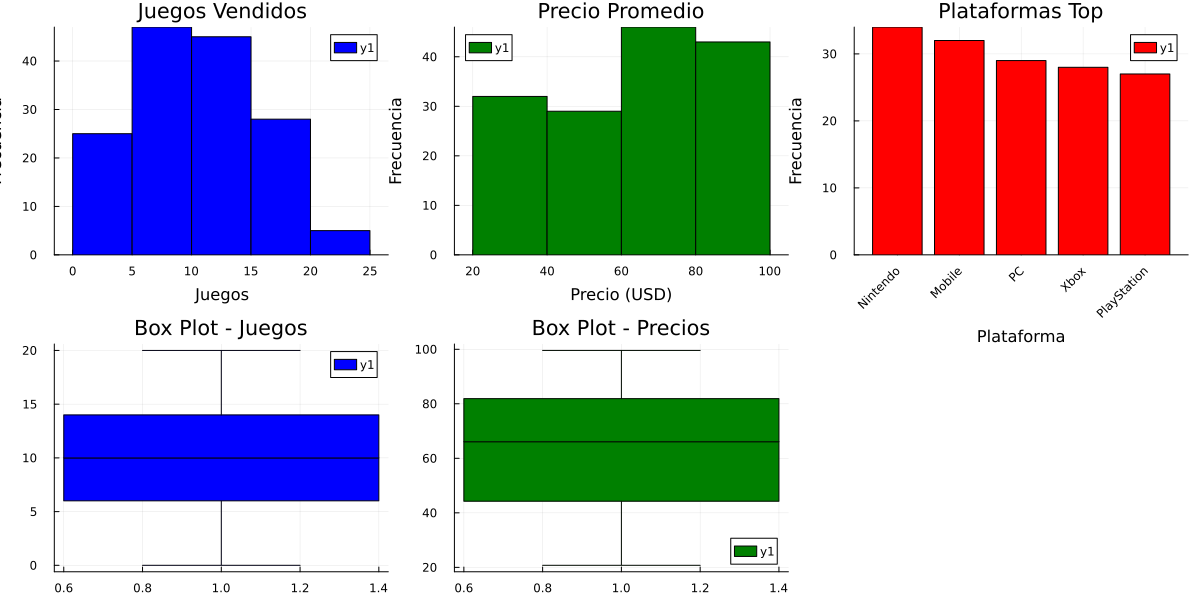

In [56]:
# =============================================================================
# GRÁFICAS
# =============================================================================

# Histograma variable discreta
p1 = histogram(juegos_vendidos, title="Juegos Vendidos", 
               xlabel="Juegos", ylabel="Frecuencia", color=:blue)

# Histograma variable continua  
p2 = histogram(precio_promedio, title="Precio Promedio",
               xlabel="Precio (USD)", ylabel="Frecuencia", color=:green)

# Gráfico de barras variable cualitativa
nombres = [x[1] for x in sort(collect(frecuencias), by=x->x[2], rev=true)]
valores = [x[2] for x in sort(collect(frecuencias), by=x->x[2], rev=true)]

p3 = bar(nombres, valores, title="Plataformas Top",
         xlabel="Plataforma", ylabel="Frecuencia", xrotation=45, color=:red)

# Box plots
p4 = boxplot([juegos_vendidos], title="Box Plot - Juegos", color=:blue)
p5 = boxplot([precio_promedio], title="Box Plot - Precios", color=:green)

# Mostrar todas las gráficas
plot(p1, p2, p3, p4, p5, layout=(2,3), size=(1200,600))



## INTERPRETACIONES

### Juegos vendidos (Variable discreta)
La tienda vende, en promedio, 10 juegos al día. 
\
Asimismo, la tienda vende hasta 10 juegos en el 50% de los días analizados. 
\
Con mayor frecuencia se vendieron 14 juegos en un día.
\
El 50% de los juegos vendidos por la tienda es menor a 10 por día.
\
El 25% de juegos vendidos por dia es menor a 6 juegos.
\
El 75% de juegos vendidos por dia es menor a 14 juegos.
\
La desviación estándar es de 5.5 juegos vendidos por día.

### Precio promedio (Variable continua)
El precio promedio de los juegos es de 62.98 dólares
\
La desviación estándar es el 22.42% de la media.
\
El 25% de los precios de los juegos es menor a 44.25 dólares.
\
El 50% de los precios de los juegos es menor a 66.09 dólares.
\
El 75% de los precios de los juegos es menor a 81.9 dólares.
\
Se espera que el precio promedio de los juegos vendidos tenga una variación de 22.42 dólares por día.

### Plataforma top (Variable cualitativa)
La plataforma con el mayor número de ventas es Nintendo, pues fue la plataforma con más juegos vendidos en el 22,7% de los días.  
\
Por otro lado, los juegos de PlayStation fueron los más vendidos solo en el 18% de los días analizados.
